In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('i4talent.csv')

In [3]:
df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [4]:
len(df)

49753

In [5]:
df['datum'] = pd.to_datetime(df['datum'])
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'])
df['indiensttreding_datum'] = pd.to_datetime(df['indiensttreding_datum'])
df['uitdiensttreding_datum'] = pd.to_datetime(df['uitdiensttreding_datum'])
df['WerknemerID'] = df['WerknemerID'].astype(str)
df['klant_id'] = df['klant_id'].astype(str) 

df.drop(['geslacht_id'],axis=1,inplace=True)

In [6]:
df.dtypes

WerknemerID                       object
datum                     datetime64[ns]
geboortedatum             datetime64[ns]
indiensttreding_datum     datetime64[ns]
uitdiensttreding_datum    datetime64[ns]
leeftijd                         float64
lengte_dienst                    float64
stad                              object
afdeling                          object
klant_id                          object
geslacht                          object
uitdiensttreding_reden            object
uitdiensttreding_type             object
STATUS_JAAR                        int64
STATUS                            object
BUSINESS_UNIT                     object
dtype: object

In [7]:
df.isnull().sum()

WerknemerID                  0
datum                        0
geboortedatum                0
indiensttreding_datum        0
uitdiensttreding_datum       0
leeftijd                  5100
lengte_dienst             4951
stad                      5543
afdeling                  5065
klant_id                     0
geslacht                     0
uitdiensttreding_reden       0
uitdiensttreding_type        0
STATUS_JAAR                  0
STATUS                       0
BUSINESS_UNIT                0
dtype: int64

In [8]:
df['leeftijd'] = round((df['datum'] -  df['geboortedatum']) / np.timedelta64(1, 'Y'),1)
df['lengte_dienst'] = round((df['datum'] -  df['indiensttreding_datum']) / np.timedelta64(1, 'Y'),1)
df['stad'] = df['stad'].fillna('Onbekend')
df['afdeling'] = df['afdeling'].fillna('Onbekend')

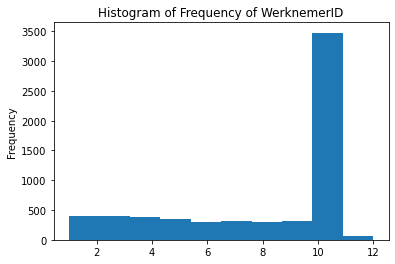

In [9]:
df['WerknemerID'].value_counts().to_frame()['WerknemerID'].plot(kind = 'hist', title ='Histogram of Frequency of WerknemerID');

In [10]:
df['WerknemerID'].nunique()

6284

In [11]:
df[df['STATUS'] == 'Beëindigd']['WerknemerID'].nunique()

1485

In [12]:
'{:.2%}'.format(1485/6284)

'23.63%'

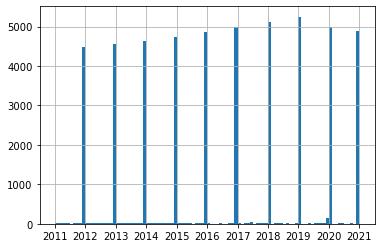

In [13]:
df['datum'].hist(bins = 100);

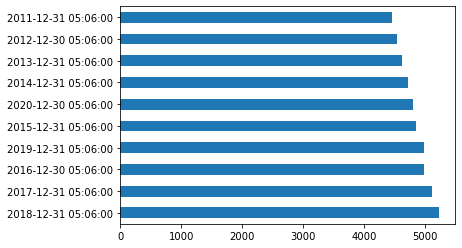

In [14]:
df['datum'].value_counts().to_frame()['datum'][:10].plot(kind = 'barh');

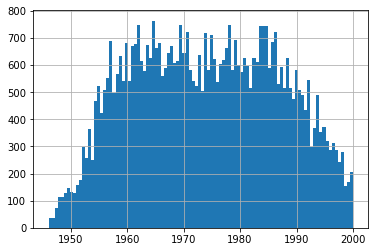

In [15]:
df['geboortedatum'].hist(bins=100);

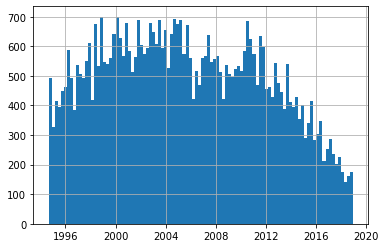

In [16]:
df['indiensttreding_datum'].hist(bins=100);

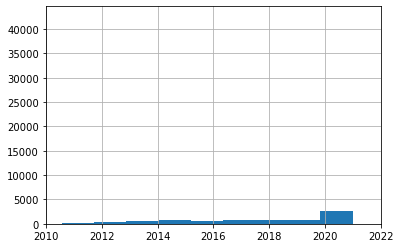

In [17]:
df['uitdiensttreding_datum'].hist(bins=100).set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2022-01-01'));

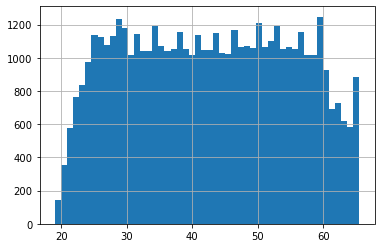

In [18]:
df['leeftijd'].hist(bins=50);

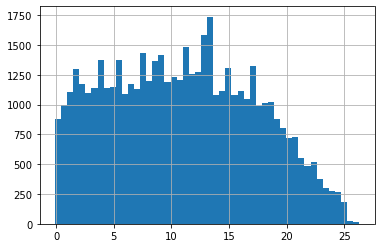

In [19]:
df['lengte_dienst'].hist(bins=50);

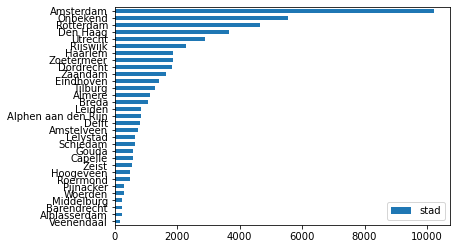

In [20]:
df['stad'].value_counts().to_frame().sort_values('stad').plot(kind = 'barh'); 

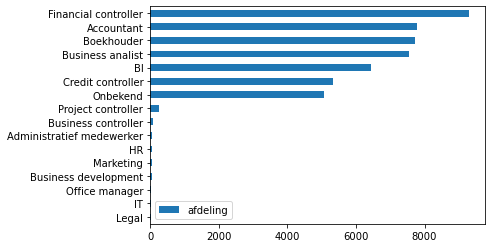

In [21]:
df['afdeling'].value_counts().to_frame().sort_values('afdeling').plot(kind = 'barh'); 

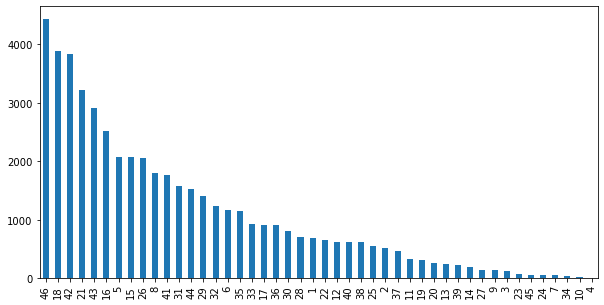

In [22]:
df['klant_id'].value_counts().plot(kind = 'bar',figsize=(10,5));

In [23]:
df['klant_id'].nunique()

46

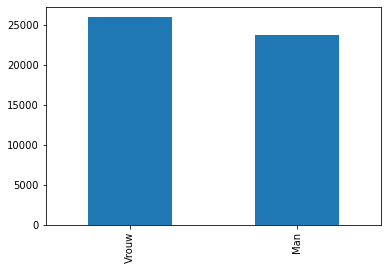

In [24]:
df['geslacht'].value_counts().plot(kind = 'bar');

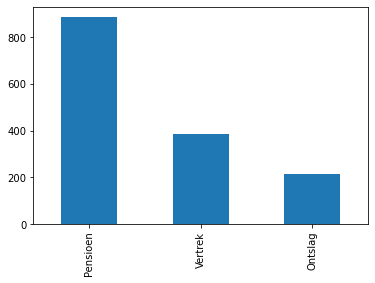

In [25]:
df[df['uitdiensttreding_reden'] != 'Niet van toepassing']['uitdiensttreding_reden'].value_counts().plot(kind = 'bar');

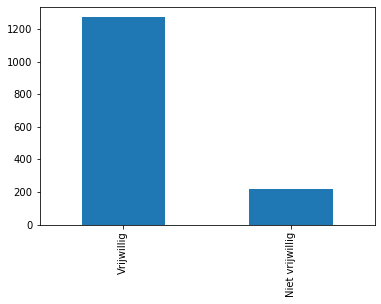

In [26]:
df[df['uitdiensttreding_type'] != 'Niet van toepassing']['uitdiensttreding_type'].value_counts().plot(kind = 'bar');

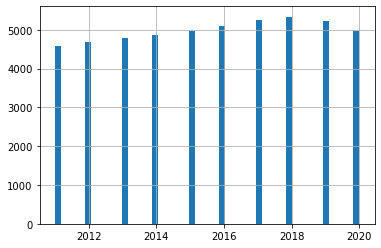

In [27]:
df['STATUS_JAAR'].hist(bins=50);

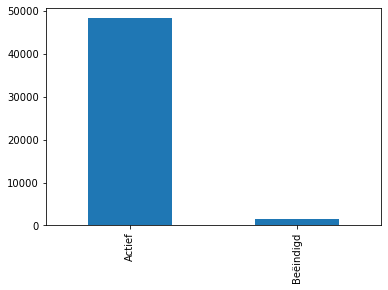

In [28]:
df['STATUS'].value_counts().plot(kind = 'bar');

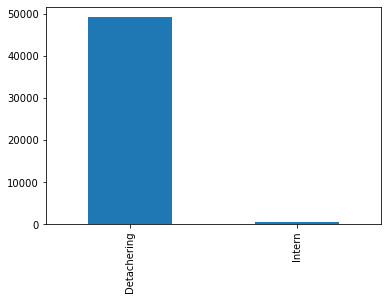

In [29]:
df['BUSINESS_UNIT'].value_counts().plot(kind = 'bar');

## Sort df on WerknemerID

In [30]:
df_sorted = df.sort_values(['WerknemerID','datum'], axis=0)

In [31]:
df_sorted.drop(columns=['datum','geboortedatum','indiensttreding_datum','uitdiensttreding_datum','uitdiensttreding_reden','uitdiensttreding_type','STATUS_JAAR'],inplace=True)

In [32]:
df_sorted.drop_duplicates('WerknemerID', keep = 'last', inplace = True)

In [33]:
df_sorted = df_sorted.reset_index(drop = True)
df_sorted.drop('WerknemerID', axis = 1, inplace = True)

In [34]:
df_sorted.head()

,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht,STATUS,BUSINESS_UNIT
0,62.0,26.3,Amsterdam,Onbekend,35,Man,Actief,Intern
1,59.0,26.3,Amsterdam,Onbekend,35,Vrouw,Actief,Intern
2,61.0,26.3,Amsterdam,Business controller,35,Vrouw,Actief,Intern
3,57.0,26.3,Amsterdam,Business controller,35,Man,Actief,Intern
4,58.0,26.3,Amsterdam,Business controller,35,Man,Actief,Intern


C:\Users\joach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


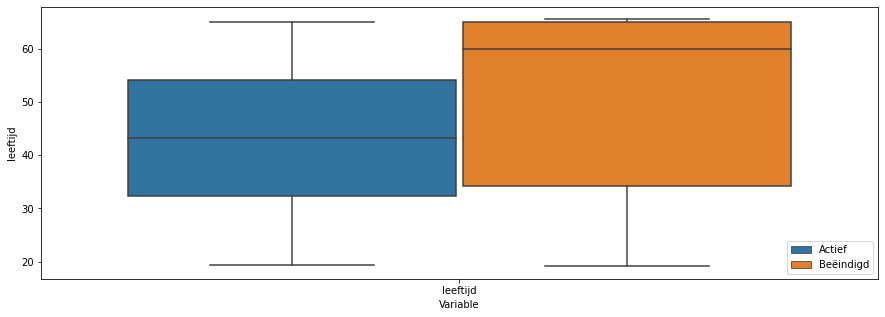

In [35]:
melt_df = df_sorted[['STATUS','leeftijd']].melt(id_vars="STATUS", value_name="leeftijd", var_name="Variable")
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=melt_df, x='Variable',  y='leeftijd', hue='STATUS', ax=ax)

plt.legend(loc='lower right');

C:\Users\joach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


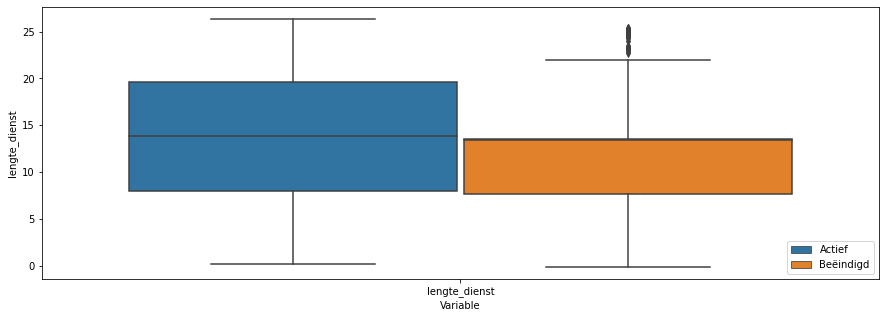

In [36]:
melt_df = df_sorted[['STATUS','lengte_dienst']].melt(id_vars="STATUS", value_name="lengte_dienst", var_name="Variable")
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=melt_df, x='Variable',  y='lengte_dienst', hue='STATUS', ax=ax)

plt.legend(loc='lower right');

In [37]:
def barplot_against_status(feature,min_count,height):
    df_plot = (df_sorted.groupby([feature,'STATUS']).size().sort_values(ascending = True).unstack(level=-1).reset_index())
    df_plot['sum'] = df_sorted.groupby(feature).size().to_list()
    df_plot = df_plot[df_plot['sum'] > min_count]
    df_plot = df_plot.sort_values('sum',ascending = True)
    df_plot.drop(columns='sum',inplace=True)
    df_plot.plot.barh(x=feature, stacked=True,figsize=(20,height),fontsize=15); 
    plt.title(feature,fontsize=20);

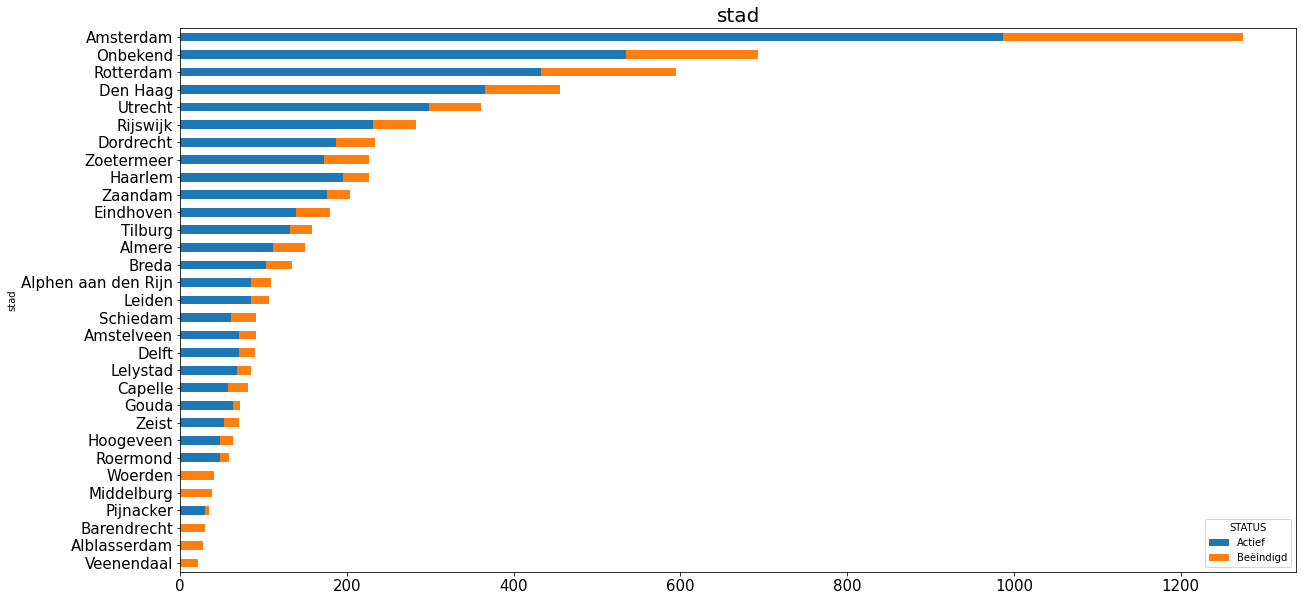

In [38]:
barplot_against_status('stad', 0, 10)

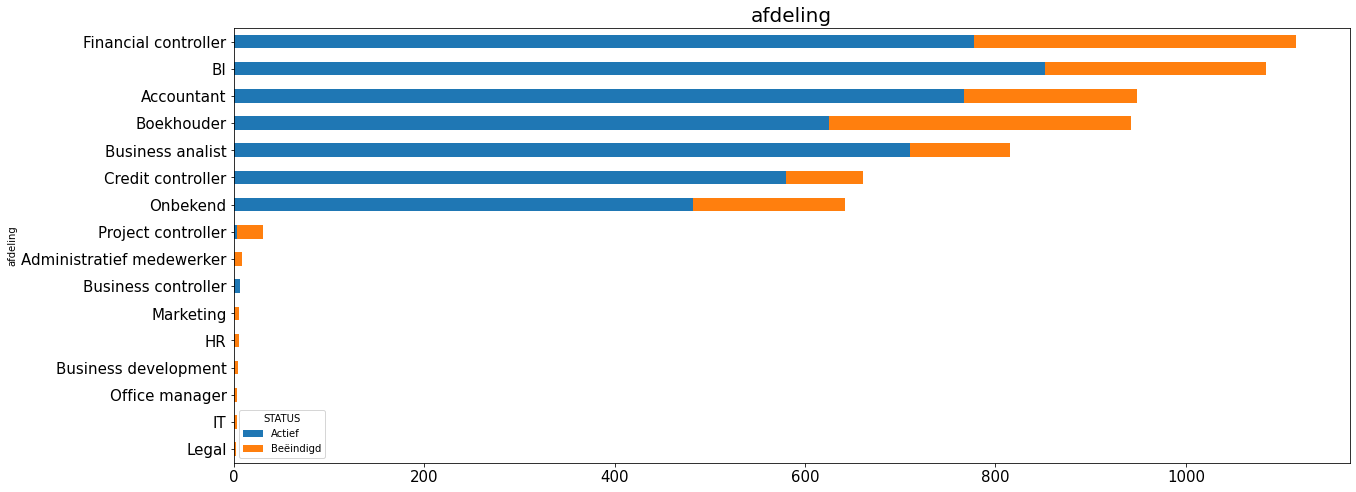

In [39]:
barplot_against_status('afdeling', 0, 8)

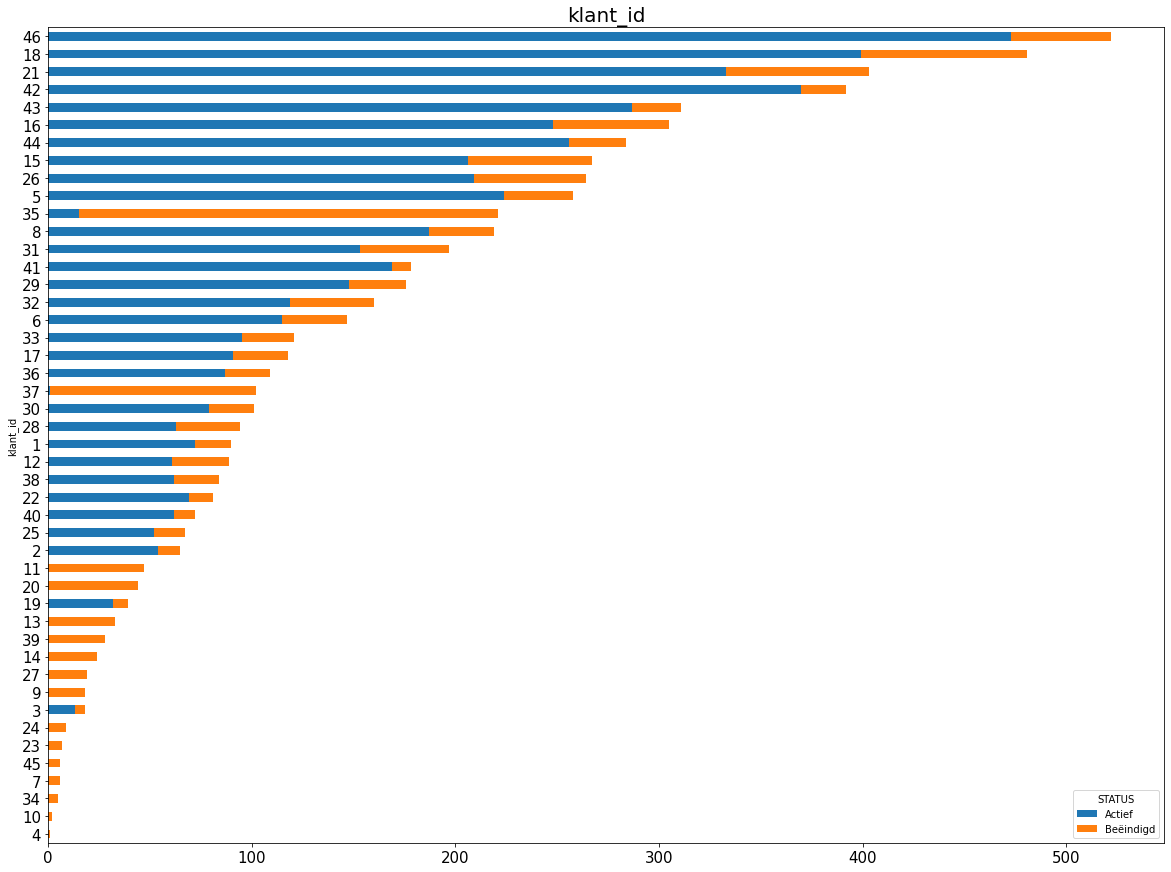

In [40]:
barplot_against_status('klant_id', 0, 15)

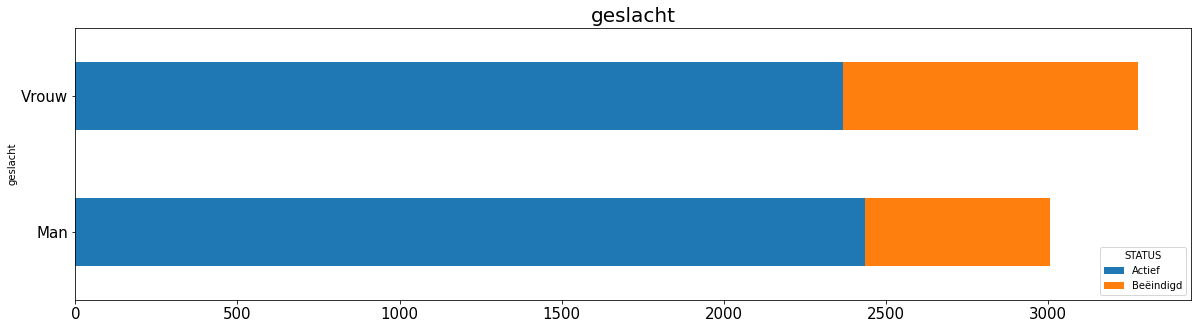

In [41]:
barplot_against_status('geslacht', 0, 5)

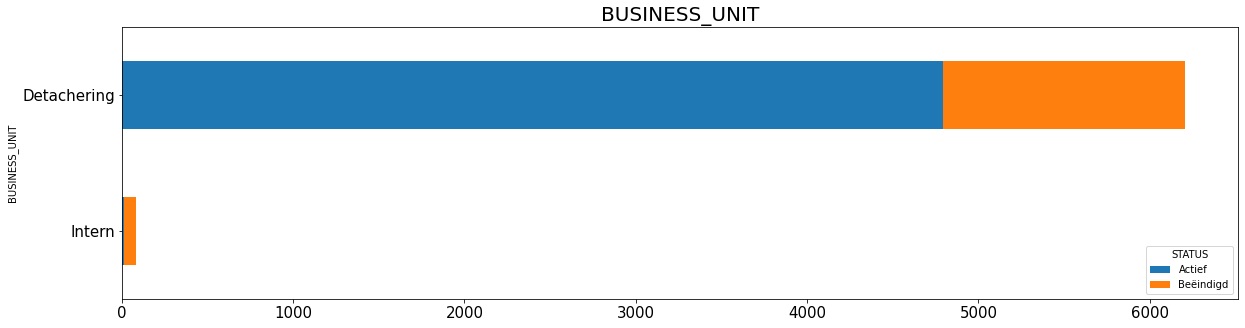

In [42]:
barplot_against_status('BUSINESS_UNIT', 0, 5)